<a href="https://colab.research.google.com/github/Rasamps/drug-misuse/blob/master/apply_pca(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

df = pd.read_csv("drug_cons_data.csv", header = 0)

In [2]:
le_data = df.filter(items = ['Ascore','Cscore','Escore','Nscore','Oscore','Cann','Nico'])
ohe_data = df.filter(items = ['Ascore','Cscore','Escore','Nscore','Oscore','Cann','Nico'])

drugs = ["Alc","Amph","Amyl","Benz","Caff","Choc","Coke","Crack","Ect",
        "Heroin","Keta","Legalh","LSD","Meth","Shrooms","Semer","VSA"]

drugset = df.filter(items = drugs)

for drug in drugs:
    drugset.loc[(drugset[drug] == 'CL0'), drug] = 0
    drugset.loc[(drugset[drug] == 'CL1'), drug] = 1
    drugset.loc[(drugset[drug] == 'CL2'), drug] = 2
    drugset.loc[(drugset[drug] == 'CL3'), drug] = 3
    drugset.loc[(drugset[drug] == 'CL4'), drug] = 4
    drugset.loc[(drugset[drug] == 'CL5'), drug] = 5
    drugset.loc[(drugset[drug] == 'CL6'), drug] = 6

print(le_data.head())
print(ohe_data.head())

    Ascore   Cscore   Escore   Nscore   Oscore Cann Nico
0 -0.91699 -0.00665 -0.57545  0.31287 -0.58331  CL0  CL2
1  0.76096 -0.14277  1.93886 -0.67825  1.43533  CL4  CL4
2 -1.62090 -1.01450  0.80523 -0.46725 -0.84732  CL3  CL0
3  0.59042  0.58489 -0.80615 -0.14882 -0.01928  CL2  CL2
4 -0.30172  1.30612 -1.63340  0.73545 -0.45174  CL3  CL2
    Ascore   Cscore   Escore   Nscore   Oscore Cann Nico
0 -0.91699 -0.00665 -0.57545  0.31287 -0.58331  CL0  CL2
1  0.76096 -0.14277  1.93886 -0.67825  1.43533  CL4  CL4
2 -1.62090 -1.01450  0.80523 -0.46725 -0.84732  CL3  CL0
3  0.59042  0.58489 -0.80615 -0.14882 -0.01928  CL2  CL2
4 -0.30172  1.30612 -1.63340  0.73545 -0.45174  CL3  CL2


In [3]:
#Label Encoded Dataframe
from sklearn import preprocessing
import numpy as np
le = preprocessing.LabelEncoder()

for col in le_data.columns:
  if (le_data[col].dtype == np.object):
    le_data[col] = le.fit_transform(le_data[col])

print(le_data.head())

    Ascore   Cscore   Escore   Nscore   Oscore  Cann  Nico
0 -0.91699 -0.00665 -0.57545  0.31287 -0.58331     0     2
1  0.76096 -0.14277  1.93886 -0.67825  1.43533     4     4
2 -1.62090 -1.01450  0.80523 -0.46725 -0.84732     3     0
3  0.59042  0.58489 -0.80615 -0.14882 -0.01928     2     2
4 -0.30172  1.30612 -1.63340  0.73545 -0.45174     3     2


In [0]:
#One Hot Encoded Dataframe

ohe = preprocessing.OneHotEncoder(sparse = False)

encoded_cann = le.fit_transform(ohe_data['Cann'])
encoded_nico = le.fit_transform(ohe_data['Nico'])

ohe_data = ohe_data.drop(columns = ['Cann','Nico'])

ohe_cann = ohe.fit_transform(encoded_cann.reshape(len(encoded_cann),1))
ohe_nico = ohe.fit_transform(encoded_nico.reshape(len(encoded_nico),1))

ohe_cann = pd.DataFrame({'ColA1': ohe_cann[:, 0], 'ColA2': ohe_cann[:, 1], 'ColA3': ohe_cann[:, 2],
                        'ColA4': ohe_cann[:, 3], 'ColA5': ohe_cann[:, 4], 'ColA6': ohe_cann[:, 5]})
ohe_nico = pd.DataFrame({'ColB1': ohe_nico[:, 0], 'ColB2': ohe_nico[:, 1], 'ColB3': ohe_nico[:, 2],
                        'ColB4': ohe_nico[:, 3], 'ColB5': ohe_nico[:, 4], 'ColB6': ohe_nico[:, 5]})
ohe_data = pd.concat([ohe_data,ohe_cann,ohe_nico], axis = 1)

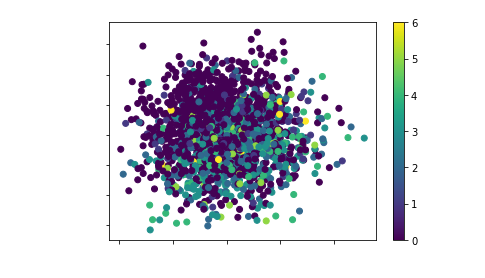

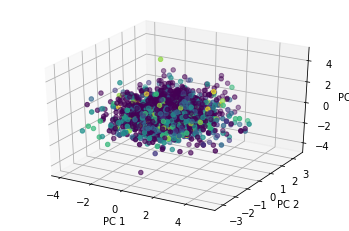

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

labels = drugset['Coke']

pca2D = PCA(n_components = 2)
pca3D = PCA(n_components = 3)

ohe_2D_results = pca2D.fit_transform(ohe_data)
ohe_3D_results = pca3D.fit_transform(ohe_data)

plt.title('PCA applied to dataset with One Hot Encoded Categorical Features, N = 2 & 3', color = 'w')
plt.scatter(ohe_2D_results[:,0], ohe_2D_results[:,1], c = labels)
plt.colorbar()
plt.xlabel("Principal Component 1", color = 'w')
plt.xticks(color = 'w')
plt.ylabel("Principal Component 2", color = 'w')
plt.yticks(color = 'w')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ohe_3D_results[:,0],ohe_3D_results[:,1],ohe_3D_results[:,2], c = labels)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.show()

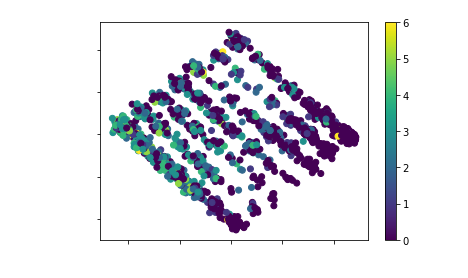

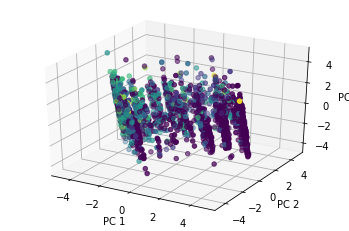

In [6]:
labels = drugset['Coke']

pca2D = PCA(n_components = 2)
pca3D = PCA(n_components = 3)

le_2D_results = pca2D.fit_transform(le_data)
le_3D_results = pca3D.fit_transform(le_data)

plt.title('PCA applied to dataset with Label Encoded Categorical Features, N = 2 & 3', color = 'w')
plt.scatter(le_2D_results[:,0], le_2D_results[:,1], c = labels)
plt.colorbar()
plt.xlabel("Principal Component 1", color = 'w')
plt.xticks(color = 'w')
plt.ylabel("Principal Component 2", color = 'w')
plt.yticks(color = 'w')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(le_3D_results[:,0],le_3D_results[:,1],le_3D_results[:,2], c = labels)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.show()